In [1]:
from featurewiz import featurewiz

Imported featurewiz: Auto_ViML's feature engg and selection library. Version=0.0.8
output_tuple = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2,  sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Let featurewiz add features! Set feature_engg as: 'interactions' or 'groupby' or 'target'
Instead, you can also choose your own category_encoders from list below:
['HashingEncoder', 'SumEncoder', 'PolynomialEncoder', 'BackwardDifferenceEncoder',
'OneHotEncoder', 'HelmertEncoder', 'OrdinalEncoder', 'FrequencyEncoder', 'BaseNEncoder',
'TargetEncoder', 'CatBoostEncoder', 'WOEEncoder', 'JamesSteinEncoder']



In [2]:
import numpy as np
import pandas as pd
datapath = '../Ram/Data_Sets/'
filename = 'adult.csv'

In [3]:
sep = ','
dataset = pd.read_csv(datapath+filename,sep=sep)
print(dataset.shape)
dataset.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
RANDOM_SEED = 99
target = 'income'
preds = [x for x in list(dataset) if x != target]
len(preds)

14

In [5]:
dataset[target] = dataset[target].astype('category').cat.codes
dataset.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=RANDOM_SEED,)
print(train.shape, test.shape)

(39073, 15) (9769, 15)


Skipping category encoding since no category encoders specified in input...
Shape of your Data Set loaded: (39073, 15)
    No GPU active on this device
    Running XGBoost using CPU parameters
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    14 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
#### Single_Label Binary_Classification Feature Selection Started ####
Starting feature engineering...this will take time...
Source X_train shape:  (39073, 13) | X_test shape:  (9769, 13)
##################################################
> Start preprocessing with 13 variables
> Generate Categorical Encoded features
 + To know more, click: https://contrib.scikit-learn.org/category_encoders/ordinal.html
 + added  0  additional Features using OrdinalEncoder
> Generate Target Encoded categorical features
 + To know more, click: https://contrib.scikit-learn.org/category_encoders

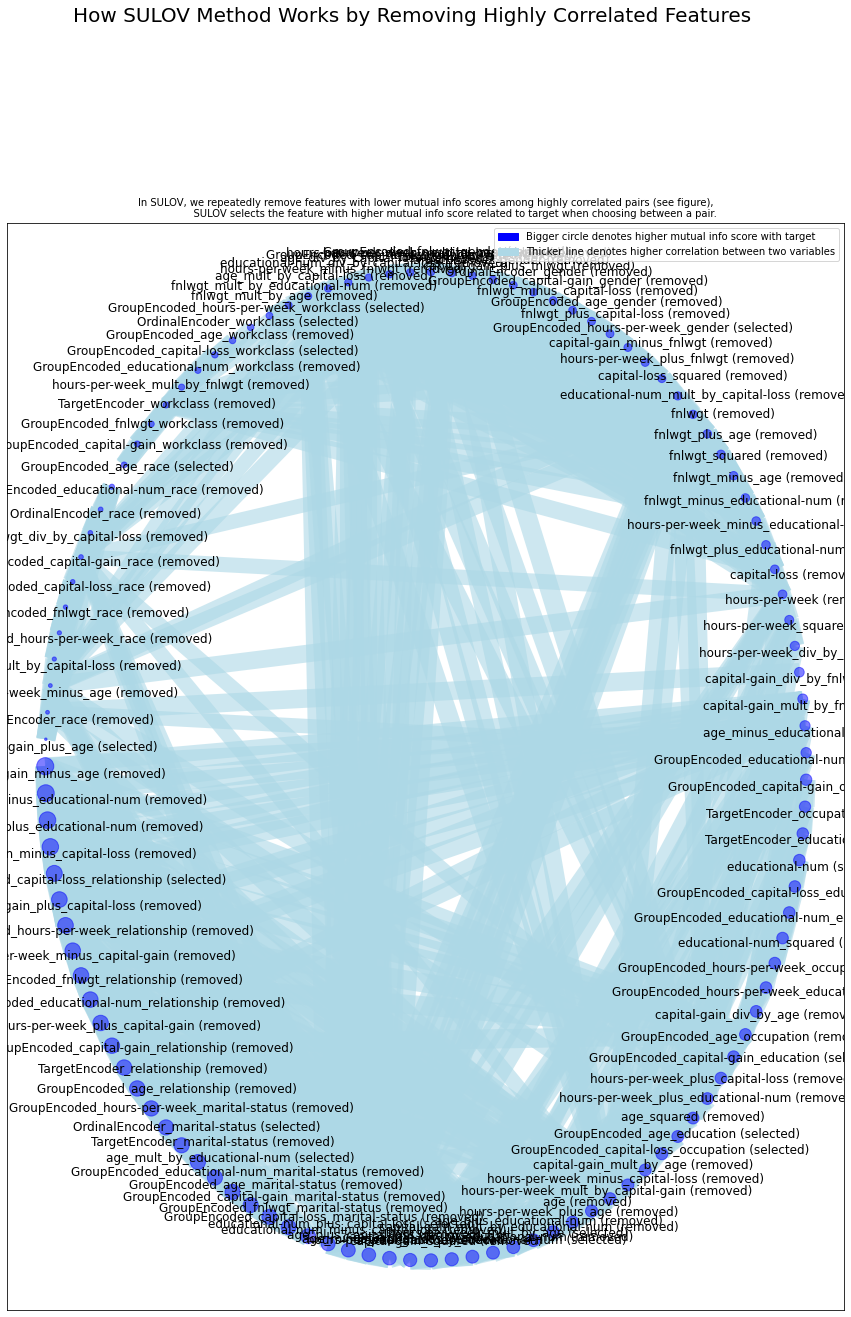

    Adding 0 categorical variables to reduced numeric variables  of 32
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 32 
    Finding Important Features using Boosted Trees algorithm...
        using 32 variables...
        using 26 variables...
        using 20 variables...
        using 14 variables...
        using 8 variables...
        using 2 variables...
    Time taken (in seconds) = 84
Returning dataframe containing 23 features after feature engineering and selection.


In [18]:
dft = featurewiz(train, target, corr_limit=0.70,verbose=1, test_data=test,
                      feature_engg=["groupby",'target','interactions'], 
                     category_encoders=''
                     )

In [8]:
#disto

In [9]:
from catboost import CatBoostClassifier
RFC = CatBoostClassifier()

In [10]:
from sklearn.ensemble import RandomForestClassifier
cat_vars = train.select_dtypes(include='category').columns.tolist() + train.select_dtypes(include='object').columns.tolist()
train[cat_vars]=train[cat_vars].fillna(train.mode().iloc[0])
RFC.fit(train[preds],train[target], cat_features=cat_vars, metric_period=100)

Learning rate set to 0.049279
0:	learn: 0.6454586	total: 273ms	remaining: 4m 33s
100:	learn: 0.2880471	total: 9.82s	remaining: 1m 27s
200:	learn: 0.2772765	total: 19s	remaining: 1m 15s
300:	learn: 0.2688421	total: 28.4s	remaining: 1m 5s
400:	learn: 0.2641188	total: 37.8s	remaining: 56.5s
500:	learn: 0.2601555	total: 48.2s	remaining: 48s
600:	learn: 0.2569043	total: 59.4s	remaining: 39.4s
700:	learn: 0.2537678	total: 1m 10s	remaining: 30.3s
800:	learn: 0.2513303	total: 1m 23s	remaining: 20.7s
900:	learn: 0.2486719	total: 1m 36s	remaining: 10.6s
999:	learn: 0.2460485	total: 1m 50s	remaining: 0us


In [11]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
test[cat_vars]=test[cat_vars].fillna(train.mode().iloc[0])
print(balanced_accuracy_score(test[target].values, RFC.predict(test[preds])))
accuracy_score(test[target].values, RFC.predict(test[preds]))

0.7945967362805471


0.8748080663322756

In [12]:
trainm, testm = dft
print(trainm.shape, testm.shape)

(39073, 16) (9769, 16)


In [13]:
cat_vars = trainm.select_dtypes(include='category').columns.tolist() + trainm.select_dtypes(include='object').columns.tolist()
trainm[cat_vars]=trainm[cat_vars].fillna(trainm.mean().iloc[0])
feats = [x for x in list(trainm) if x not in [target]]
len(feats)

15

In [14]:
RFC = CatBoostClassifier()
RFC.fit(trainm[feats],trainm[target], cat_features=cat_vars, metric_period=100)

Learning rate set to 0.049279
0:	learn: 0.6429571	total: 20.7ms	remaining: 20.6s
100:	learn: 0.2880333	total: 5.53s	remaining: 49.2s
200:	learn: 0.2747578	total: 8.88s	remaining: 35.3s
300:	learn: 0.2660312	total: 12s	remaining: 27.9s
400:	learn: 0.2606866	total: 15.5s	remaining: 23.1s
500:	learn: 0.2560225	total: 18.8s	remaining: 18.7s
600:	learn: 0.2519145	total: 22.4s	remaining: 14.9s
700:	learn: 0.2484514	total: 25.5s	remaining: 10.9s
800:	learn: 0.2453109	total: 29.3s	remaining: 7.28s
900:	learn: 0.2420970	total: 33.4s	remaining: 3.67s
999:	learn: 0.2394110	total: 36.2s	remaining: 0us


In [15]:
testm[cat_vars]=testm[cat_vars].fillna(trainm.mean().iloc[0])
print(balanced_accuracy_score(testm[target].values, RFC.predict(testm[feats])))
accuracy_score(testm[target].values, RFC.predict(testm[feats]))

0.7956989415606286


0.8719418568942573